In [28]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import io
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d 

In [204]:
genotype = pd.read_csv('try.raw', sep = " ")
genotype['subject_id'] = genotype['FID'].astype(str) + "_" + genotype['IID'].astype(str)
genotype

,FID,IID,PAT,MAT,SEX,PHENOTYPE,._C,._G,._C.1,._TAA,...,._T.4236,._G.3764,._A.4137,._A.4138,._C.3813,._G.3765,._G.3766,._T.4237,._G.3767,subject_id
0,A01,1,0,0,0,-9,NaN,NaN,1.0,0.0,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,A01_1
1,A01,2,0,0,0,-9,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,A01_2
2,A01,3,0,0,0,-9,NaN,NaN,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,A01_3
3,A01,4,0,0,0,-9,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,A01_4
4,A01,5,0,0,0,-9,2.0,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,A01_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,A11,92,0,0,0,-9,0.0,0.0,2.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,A11_92
1052,A11,93,0,0,0,-9,1.0,1.0,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,A11_93
1053,A11,94,0,0,0,-9,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,A11_94
1054,A11,95,0,0,0,-9,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,A11_95


In [205]:
pca_input=genotype.iloc[:,6:-1]
pca_input=pca_input.fillna(0)
pca_input

,._C,._G,._C.1,._TAA,._C.2,._A,._T,._G.1,._A.1,._T.1,...,._A.4136,._T.4236,._G.3764,._A.4137,._A.4138,._C.3813,._G.3765,._G.3766,._T.4237,._G.3767
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1052,1.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1053,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0


In [36]:
pca_input_standardized = StandardScaler().fit_transform(pca_input)
pca_input_standardized.mean(axis = 0)

array([ 9.75650537e-17,  9.58828976e-17, -5.38289951e-17, ...,
       -9.75650537e-17, -6.72862439e-17,  8.74721171e-17])

In [37]:
pca_input_standardized.var(axis = 0)

array([1., 1., 1., ..., 1., 1., 1.])

In [38]:
pca = PCA(n_components = 10)
pca_output = pca.fit_transform(pca_input_standardized)
pca_output
pca_output.shape

(1056, 10)

In [39]:
pca_output_df = pd.DataFrame(data = pca_output,
                            columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-8.950203,-26.703270,-3.181980,-26.537220,13.135439,-11.337836,25.618879,10.884820,-15.271573,29.733627
1,8.145580,15.751562,2.304195,38.011453,-32.737896,-34.220276,0.652101,-34.334095,-9.447968,-1.448340
2,-3.417217,31.477772,-9.765699,13.701464,-29.837129,-16.266087,1.479028,30.670857,2.998834,6.752644
3,-24.535814,14.957303,38.329572,-5.755857,15.528921,-2.367212,25.886543,-8.215647,8.529216,-13.716518
4,39.503139,-26.394203,-29.643301,7.544603,16.530019,-0.605530,-5.880794,8.672937,-25.273695,-18.656145
...,...,...,...,...,...,...,...,...,...,...
1051,4.826324,-53.728628,7.326217,-2.197716,-8.131944,-16.465851,-1.689691,-0.875258,-7.078778,-42.759921
1052,-4.623679,23.199029,-8.513987,11.714388,-35.644362,-10.266574,-20.317069,-15.228326,-23.165573,-4.240102
1053,12.783108,-26.373932,-26.992452,2.588663,-7.540475,21.964934,-19.390831,10.885239,-0.866763,-4.598923
1054,12.075038,-23.142848,-22.520163,7.650317,9.915344,23.081340,-23.064675,5.028512,8.952368,-12.441285


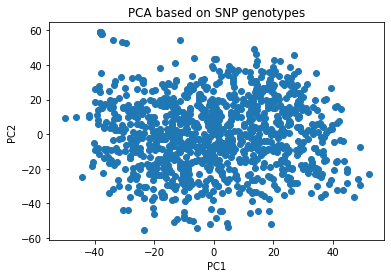

In [40]:
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])
plt.title('PCA based on SNP genotypes')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Questions2

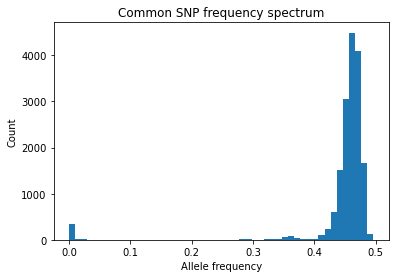

In [43]:

common_frequency=pca_input.sum(axis=0)/(len((pca_input))*2)
fig,axis = plt.subplots()
plt.hist(common_frequency,bins=50)
plt.title('Common SNP frequency spectrum')
plt.xlabel('Allele frequency')
plt.ylabel('Count')
plt.show()

## Question 3
- encode phenotype file

In [188]:
fs = open("BYxRM_PhenoData.txt","r")
data=[]
first_line = fs.readline()
b=first_line.split('\t')[1:]
# print(b)
a=['FID','ID']
a.extend(b)
data.append(a)
# print()
for line in fs:
    new_line=[]
    fullrow=line.split('\t')
    id_list=fullrow[0].split("_")
    new_line.append(id_list[0])
    new_line.append(id_list[1])
    new_line.extend(fullrow[1:])
    
    data.append(new_line)
fs.close()

    
with open("BYxRM_PhenoData_encode.txt", "w") as output:
    for row in data:
        output.write('\t'.join(row))
#         for word in row:
#             output.write(word + '\t')

            
# file.writelines(
#     '\t'.join(data) + '\n'
#     for nested_list in dict_with_lists.values())

In [189]:
fs = open("BYxRM_PhenoData_encode.txt","r")
for line in fs:
    print(line.split('\t'))


['FID', 'ID', 'Cadmium_Chloride', 'Caffeine', 'Calcium_Chloride', 'Cisplatin', 'Cobalt_Chloride', 'Congo_red', 'Copper', 'Cycloheximide', 'Diamide', 'E6_Berbamine', 'Ethanol', 'Formamide', 'Galactose', 'Hydrogen_Peroxide', 'Hydroquinone', 'Hydroxyurea', 'Indoleacetic_Acid', 'Lactate', 'Lactose', 'Lithium_Chloride', 'Magnesium_Chloride', 'Magnesium_Sulfate', 'Maltose', 'Mannose', 'Menadione', 'Neomycin', 'Paraquat', 'Raffinose', 'SDS', 'Sorbitol', 'Trehalose', 'Tunicamycin', 'x4-Hydroxybenzaldehyde', 'x4NQO', 'x5-Fluorocytosine', 'x5-Fluorouracil', 'x6-Azauracil', 'Xylose', 'YNB', 'YNB:ph3', 'YNB:ph8', 'YPD', 'YPD:15C', 'YPD:37C', 'YPD:4C', 'Zeocin\n']
['A01', '01', '-7.32351970578731', '0.279992827000249', '0.313118165836545', '1.65817907082079', '-1.60444210190495', '5.84161725611811', '-4.13094977046224', '0.821226166664529', '3.62260156257758', '-0.378746805086589', '-0.6449544101999', '0.736772421684145', '1.46869950807288', '4.25247880427656', '-0.439429122584143', '0.471260934436

## Question 4

In [182]:
def Manplot(file_name):
    gwas = pd.read_csv(file_name, sep = "\s+")
    gwas['logP'] = -1 * np.log10(gwas['P'])
    gwas['snp_index'] = range(len(gwas))
    gwas["threshold"] = gwas['logP'].apply(lambda x: 'above' if x>5 else 'below')

    chrlist=['chrI','chrII','chrIII','chrIV','chrV','chrVI','chrVII',
             'chrVIII','chrIX','chrXI','chrXII','chrXIII','chrXIV','chrXV','chrXVI','23','26']

    # 
    fig, ax = plt.subplots()
    threshold= gwas.groupby("threshold")
    for chr in chrlist: 
        for name, group in threshold:
            if name == 'above':
                ax.scatter(group["snp_index"][gwas["CHR"] == chr], group["logP"][gwas["CHR"] == chr], marker = '.',color='red' )
            
            else:
                ax.scatter(group["snp_index"][gwas["CHR"] == chr], group["logP"][gwas["CHR"] == chr], marker = '.' )
    plt.xlabel("SNPs")
    plt.ylabel("-log10(p-value)")
    plt.title(file_name)
    plt.savefig(file_name+"Manhattan plot_withpc.png")
    plt.show()



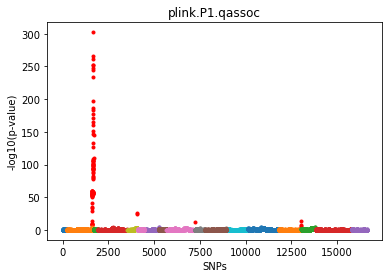

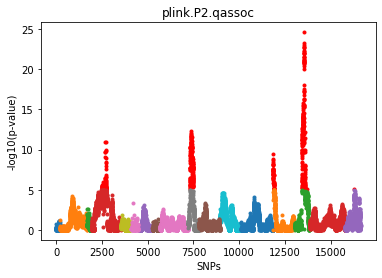

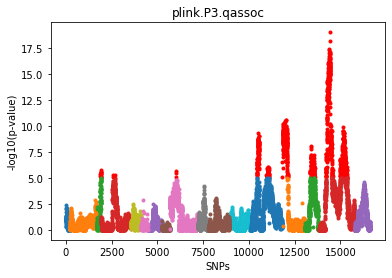

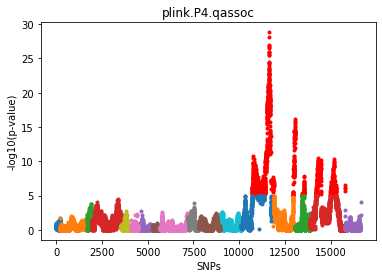

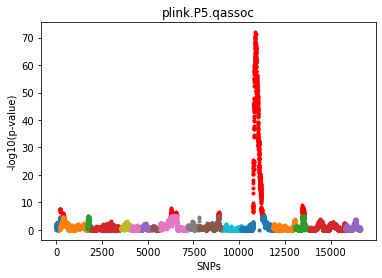

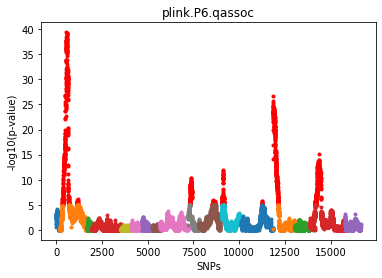

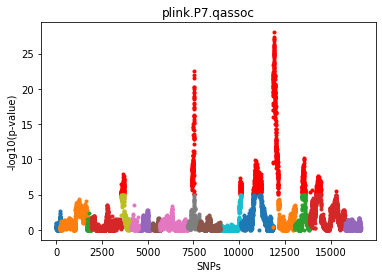

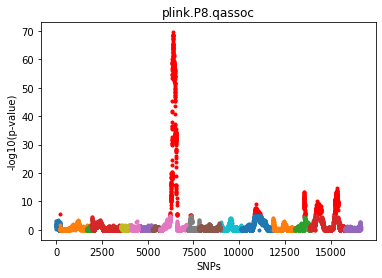

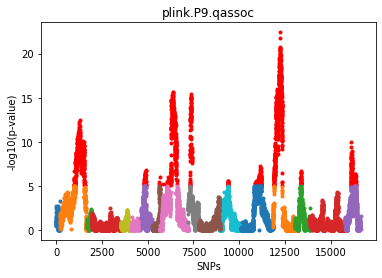

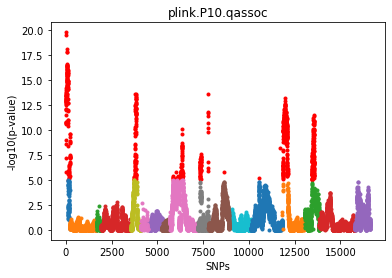

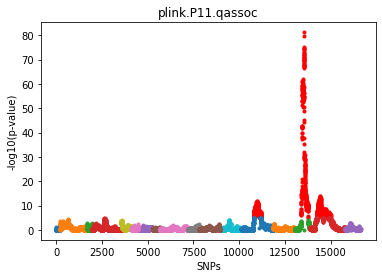

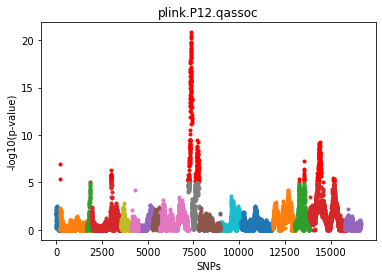

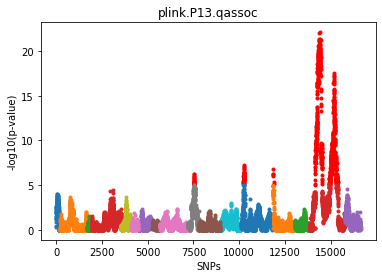

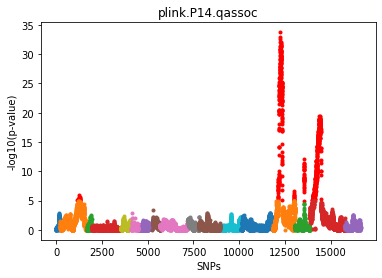

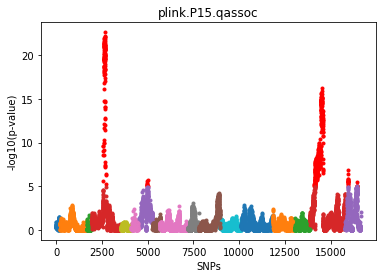

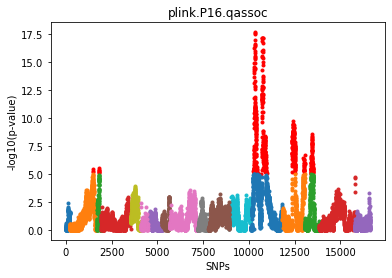

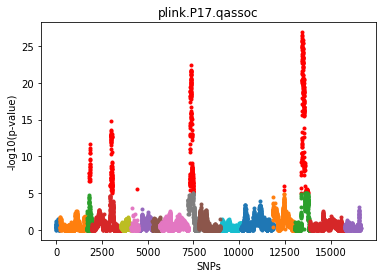

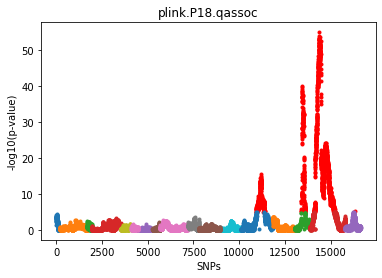

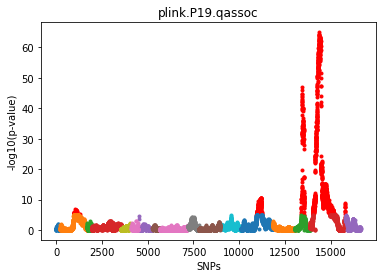

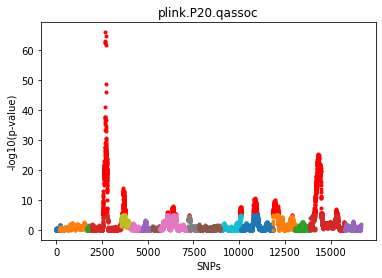

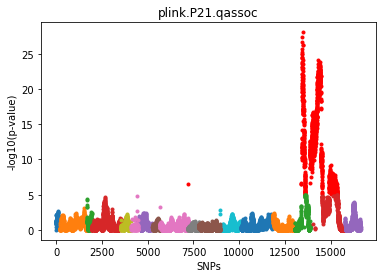

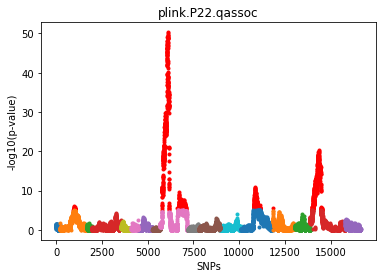

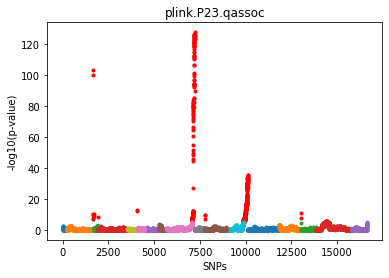

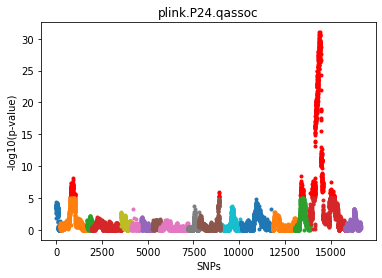

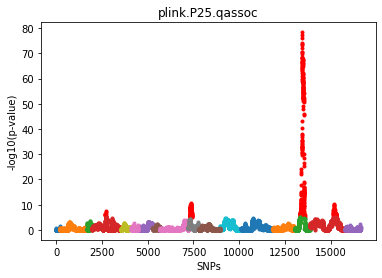

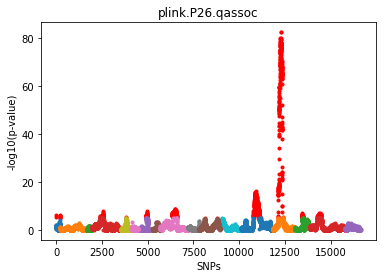

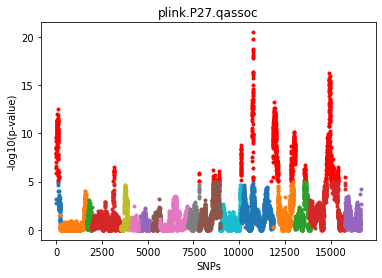

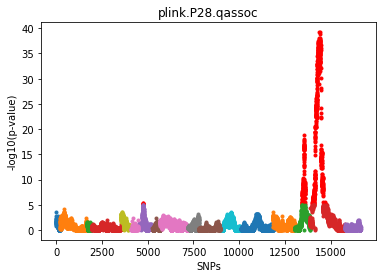

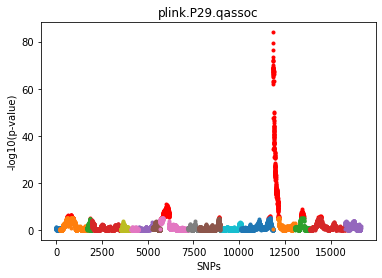

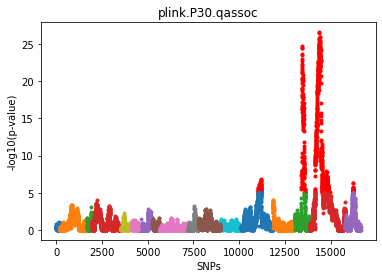

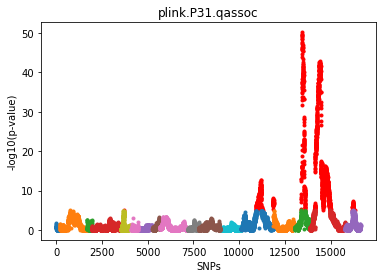

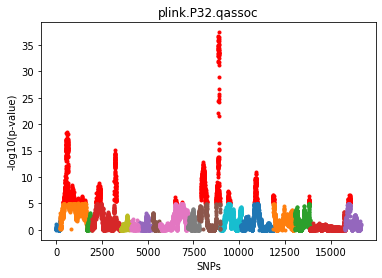

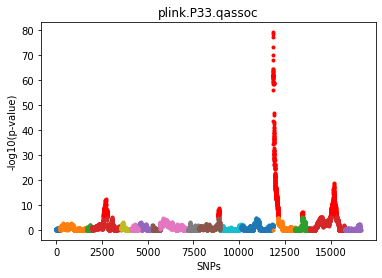

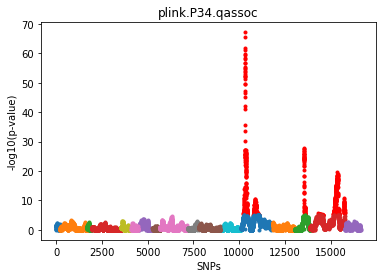

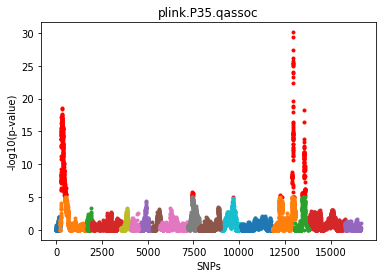

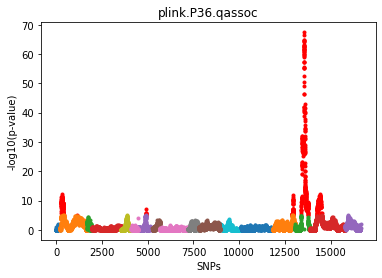

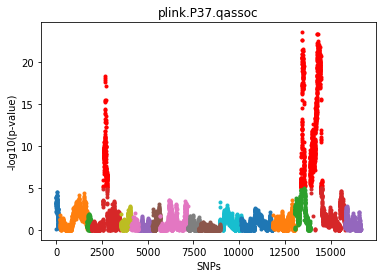

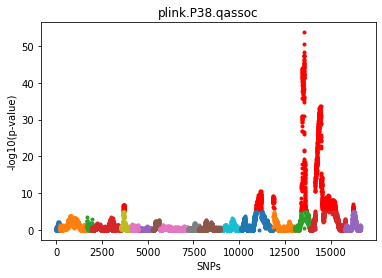

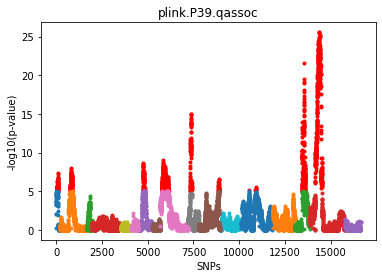

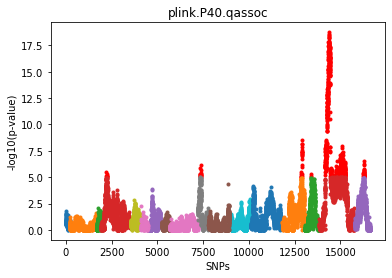

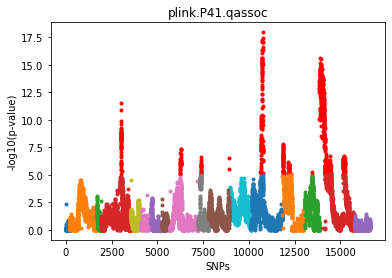

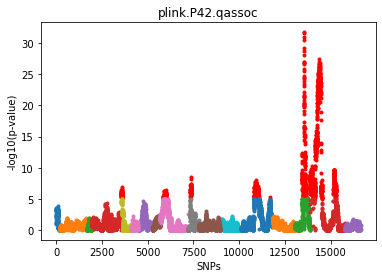

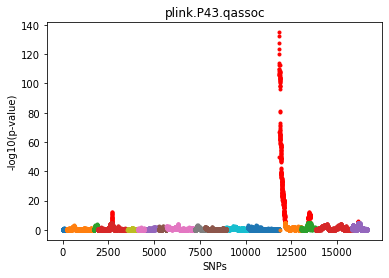

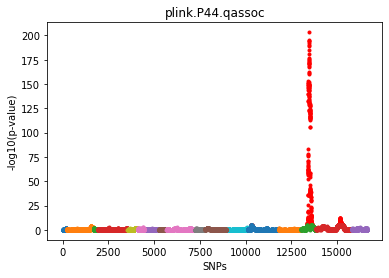

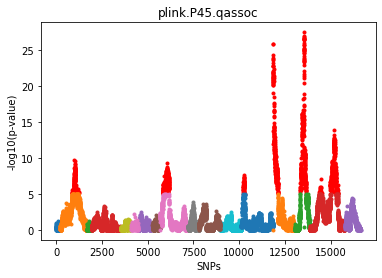

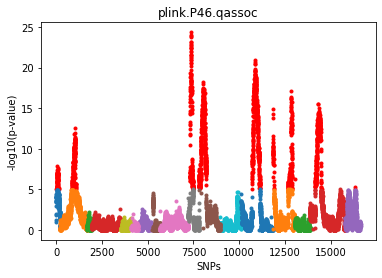

In [183]:
for name in range(1,47):
    file_name="plink.P"+str(name)+".qassoc"
    Manplot(file_name)
    
    


In [184]:
def QQplot(file_name):
    gwas = pd.read_csv(file_name, sep = "\s+")
    gwas['logP'] = -1 * np.log10(gwas['P'])
    gwas['snp_index'] = range(len(gwas))
    gwas_sorted = gwas.sort_values(by = "P")
    gwas_sorted['uniform_points'] = range(0, len(gwas_sorted))
    gwas_sorted['uniform_pval'] = (gwas_sorted['uniform_points'] + 1) / len(gwas_sorted)
    gwas_sorted['uniform_logP'] = -1 * np.log10(gwas_sorted['uniform_pval'])
    gwas['snp_index'] = range(len(gwas))

    fig, ax = plt.subplots()

    ax.scatter(gwas_sorted["uniform_logP"], gwas_sorted["logP"])
    ax.plot([8,0], [8, 0], color = "black")

    plt.xlim([0, 8])
    plt.ylim([0, 10])
    plt.xlabel("Expected -log10(p-value)")
    plt.ylabel("Observed -log10(p-value)")
    plt.title(file_name)
    plt.savefig("/Users/xiangning/qbb2020-answers/HW3/QQ_plot/"+file_name+"QQ_plot_withpc.png")
    plt.show()

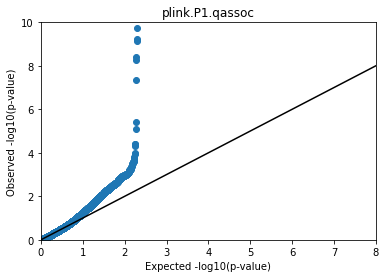

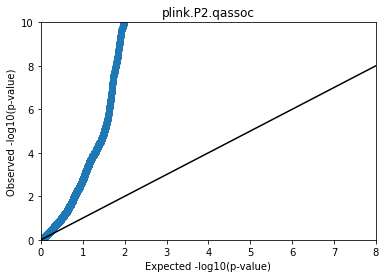

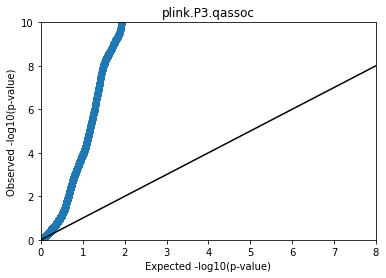

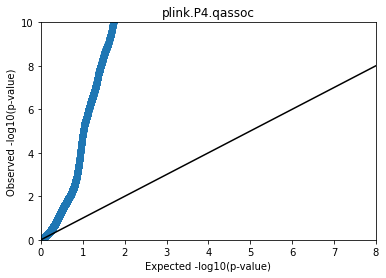

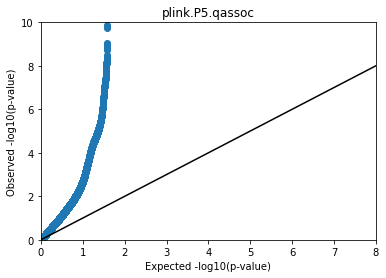

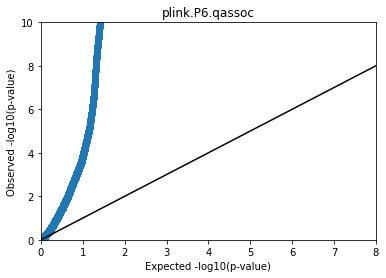

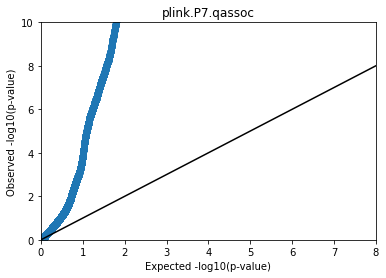

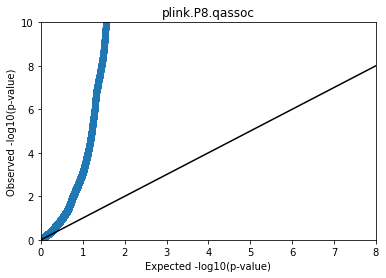

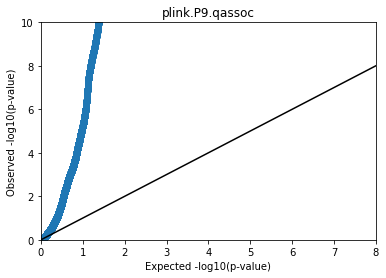

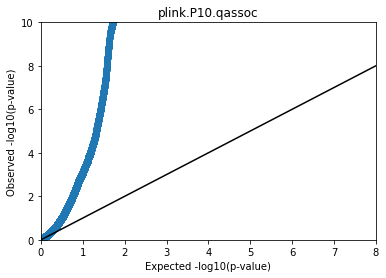

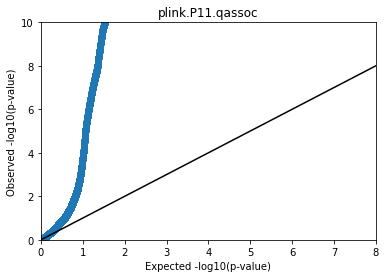

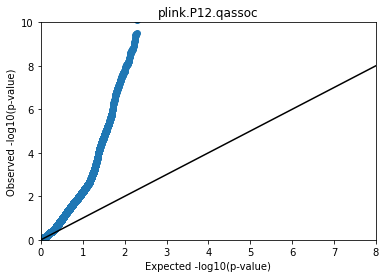

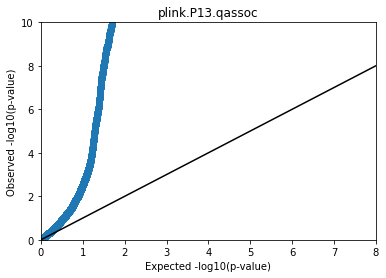

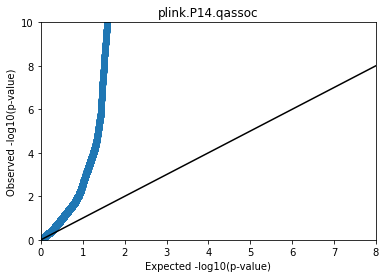

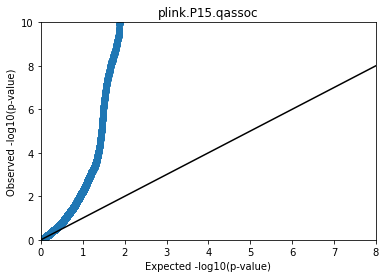

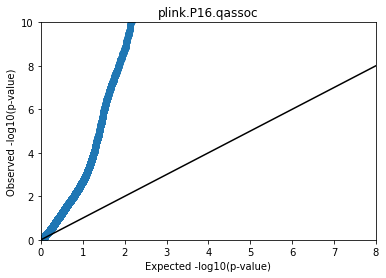

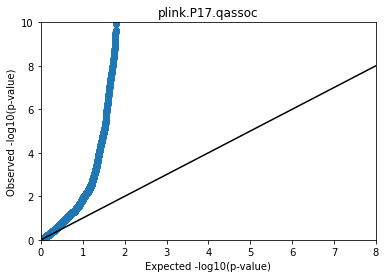

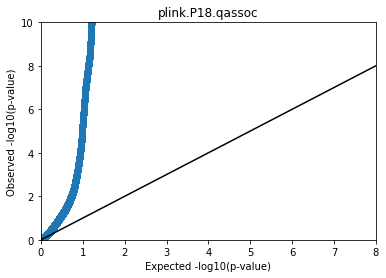

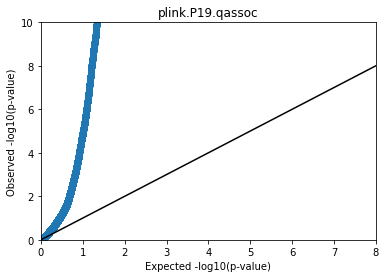

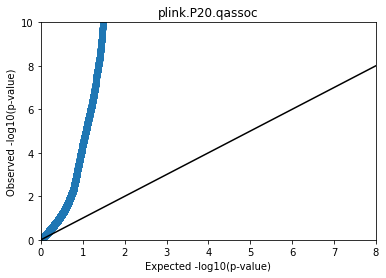

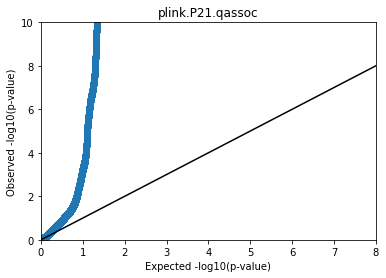

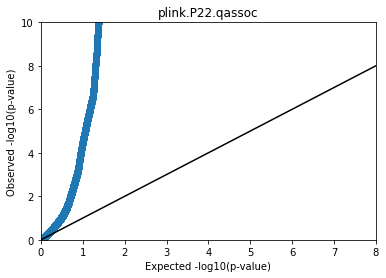

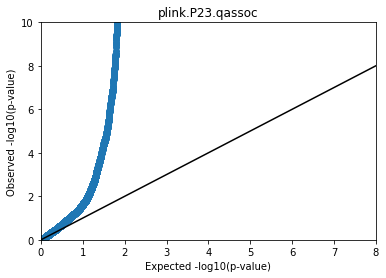

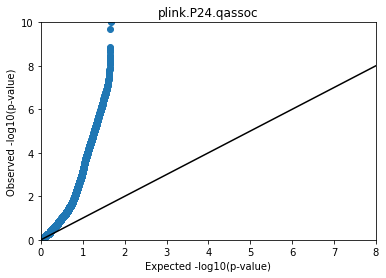

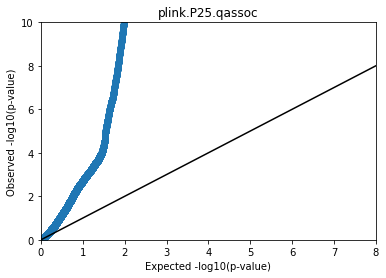

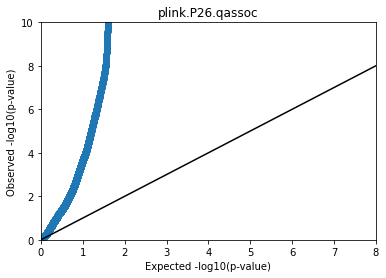

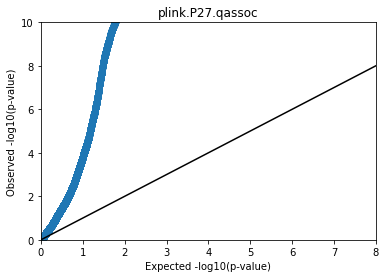

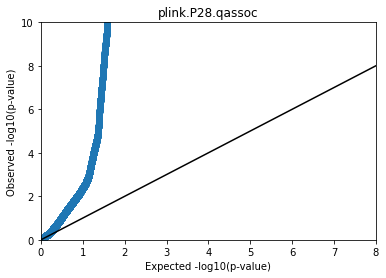

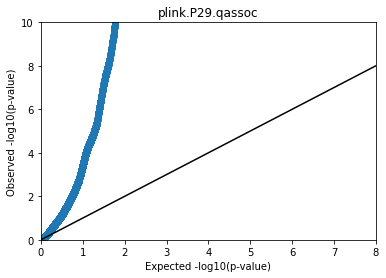

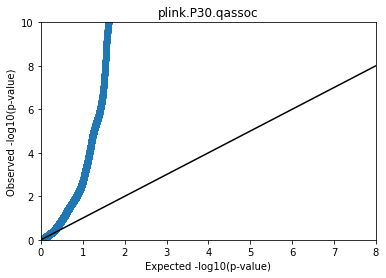

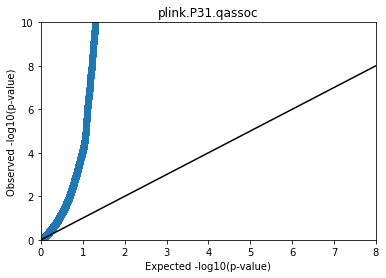

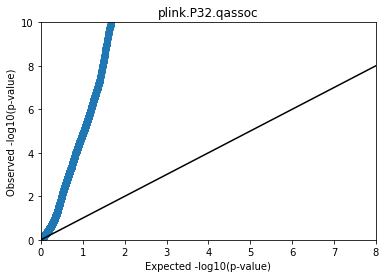

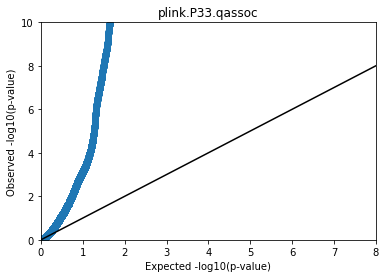

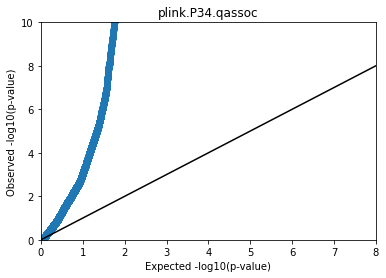

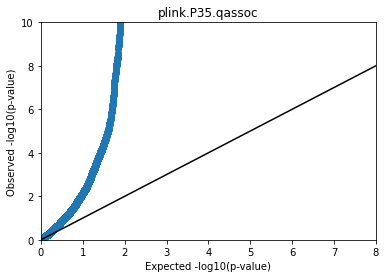

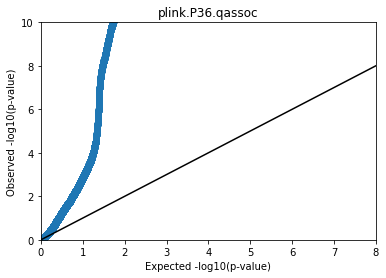

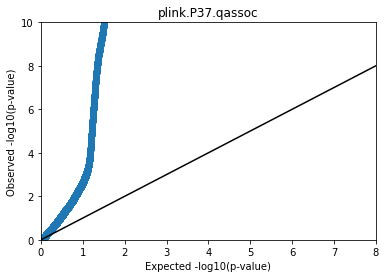

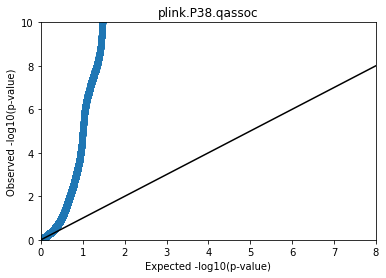

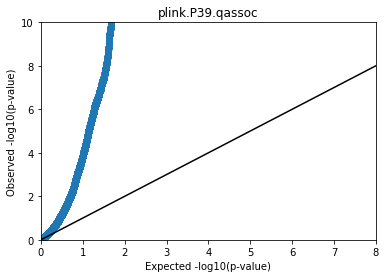

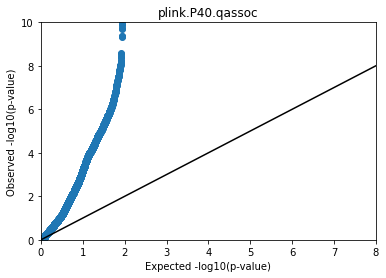

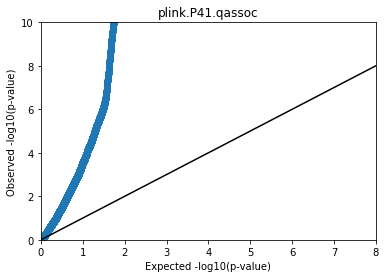

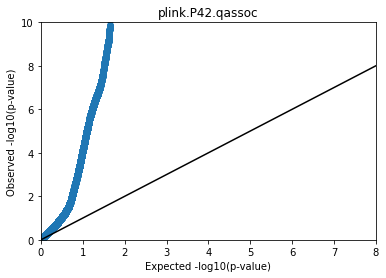

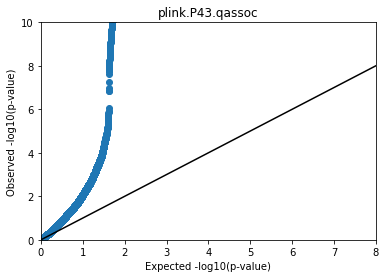

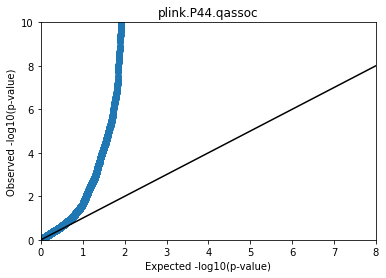

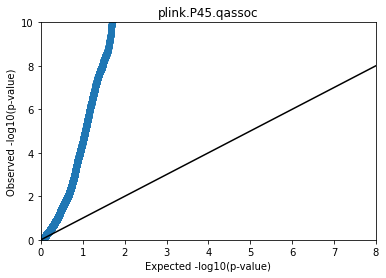

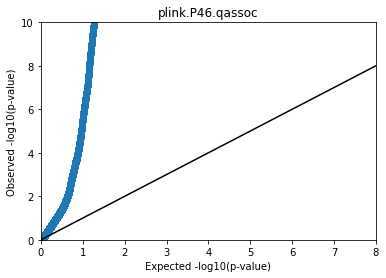

In [185]:
for name in range(1,47):
    file_name="plink.P"+str(name)+".qassoc"
    QQplot(file_name)

## Question 5

In [149]:
gwas_P1 = pd.read_csv("plink.P1.qassoc", sep = "\s+")
gwas_P1_sorted=gwas_P1.sort_values(by='P')
gwas_P1_sorted

,CHR,SNP,BP,NMISS,BETA,SE,R2,T,P
1677,chrII,.,795756,762,-5.796,0.09234,0.8383,-62.77,6.285000e-303
1678,chrII,.,798782,770,-5.640,0.10310,0.7957,-54.70,4.145000e-267
1680,chrII,.,799991,769,-5.615,0.10470,0.7893,-53.61,1.266000e-261
1683,chrII,.,800746,782,5.548,0.10770,0.7728,51.51,3.141000e-253
1679,chrII,.,799317,757,-5.584,0.10690,0.7832,-52.22,7.779000e-253
...,...,...,...,...,...,...,...,...,...
8006,23,.,97478,769,NaN,NaN,NaN,NaN,NaN
10114,chrXI,.,666556,398,NaN,NaN,NaN,NaN,NaN
12348,chrXIII,.,325905,777,NaN,NaN,NaN,NaN,NaN
13441,chrXIV,.,377887,686,NaN,NaN,NaN,NaN,NaN


In [206]:
genotype

,FID,IID,PAT,MAT,SEX,PHENOTYPE,._C,._G,._C.1,._TAA,...,._T.4236,._G.3764,._A.4137,._A.4138,._C.3813,._G.3765,._G.3766,._T.4237,._G.3767,subject_id
0,A01,1,0,0,0,-9,NaN,NaN,1.0,0.0,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,A01_1
1,A01,2,0,0,0,-9,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,A01_2
2,A01,3,0,0,0,-9,NaN,NaN,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,A01_3
3,A01,4,0,0,0,-9,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,A01_4
4,A01,5,0,0,0,-9,2.0,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,A01_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,A11,92,0,0,0,-9,0.0,0.0,2.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,A11_92
1052,A11,93,0,0,0,-9,1.0,1.0,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,A11_93
1053,A11,94,0,0,0,-9,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,A11_94
1054,A11,95,0,0,0,-9,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,A11_95


In [209]:
SNP_selected_allele=genotype.iloc[:,1677+6]
SNP_selected_info=genotype.iloc[:,0:6]
SNP_selected_id=genotype['subject_id']
SNP_selected = result = pd.concat([SNP_selected_info, SNP_selected_allele,SNP_selected_id], axis=1, sort=False)

SNP_selected 

,FID,IID,PAT,MAT,SEX,PHENOTYPE,._C.384,subject_id
0,A01,1,0,0,0,-9,2.0,A01_1
1,A01,2,0,0,0,-9,2.0,A01_2
2,A01,3,0,0,0,-9,0.0,A01_3
3,A01,4,0,0,0,-9,2.0,A01_4
4,A01,5,0,0,0,-9,0.0,A01_5
...,...,...,...,...,...,...,...,...
1051,A11,92,0,0,0,-9,2.0,A11_92
1052,A11,93,0,0,0,-9,2.0,A11_93
1053,A11,94,0,0,0,-9,0.0,A11_94
1054,A11,95,0,0,0,-9,0.0,A11_95


In [211]:
phenotype = pd.read_csv('BYxRM_PhenoData_encode.txt', sep = "\t")
phenotype['subject_id'] = phenotype['FID'].astype(str) + "_" + phenotype['ID'].astype(str)

phenotype 

,FID,ID,Cadmium_Chloride,Caffeine,Calcium_Chloride,Cisplatin,Cobalt_Chloride,Congo_red,Copper,Cycloheximide,...,Xylose,YNB,YNB:ph3,YNB:ph8,YPD,YPD:15C,YPD:37C,YPD:4C,Zeocin,subject_id
0,A01,1,-7.323520,0.279993,0.313118,1.658179,-1.604442,5.841617,-4.130950,0.821226,...,-0.309149,17.470822,0.055225,-0.184268,24.548971,0.712171,0.890842,4.118372,8.592818,A01_1
1,A01,2,-8.098236,-0.206326,-0.534844,-0.918012,0.892198,-1.618172,1.131947,-0.764736,...,0.697908,18.052925,0.283462,1.662201,26.808476,-1.522498,0.006062,0.066515,-4.220476,A01_2
2,A01,3,7.605720,-0.127960,-0.311102,-2.712088,3.301709,-6.680571,-1.138056,-3.382532,...,1.474329,18.163782,-0.951379,0.369565,26.183975,1.082289,1.723157,5.714088,-6.506519,A01_3
3,A01,4,-6.147649,0.878392,-0.563331,-0.827358,-1.291270,2.753851,-2.268121,0.867456,...,-0.739040,15.575856,-1.690867,-0.840344,20.893646,-0.636280,0.053258,-3.196936,0.294462,A01_4
4,A01,5,9.379060,-1.353169,0.405204,-1.137234,4.260286,-7.391216,-3.222742,1.586376,...,0.959138,17.808444,0.127621,1.967267,28.621507,-3.720999,-0.768724,-4.002786,7.045575,A01_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,A11,92,-4.262720,-0.893290,-0.329504,0.257061,-3.120957,2.556543,2.567092,2.054232,...,1.130568,16.629005,0.531583,NaN,23.520842,0.159946,-5.158120,-0.090273,-7.030154,A11_92
1004,A11,93,-10.147285,1.145573,0.048948,-1.089350,0.539833,2.720952,-3.445357,0.891066,...,1.977915,15.687951,-0.098451,NaN,21.553930,2.977722,-1.913176,4.279626,-4.650492,A11_93
1005,A11,94,NaN,0.321844,NaN,1.016712,1.801923,-4.157083,-0.097598,-1.954080,...,1.363267,17.357844,0.390511,NaN,23.977236,0.078992,1.801422,NaN,-0.499069,A11_94
1006,A11,95,NaN,-1.001507,NaN,0.004191,4.675717,-10.240998,1.244410,-0.810857,...,0.942454,17.098753,-0.432459,NaN,22.927686,-0.254905,-1.747526,NaN,-7.435961,A11_95


In [220]:
trait_df=phenotype[['subject_id','Cadmium_Chloride']]
trait_df

,subject_id,Cadmium_Chloride
0,A01_1,-7.323520
1,A01_2,-8.098236
2,A01_3,7.605720
3,A01_4,-6.147649
4,A01_5,9.379060
...,...,...
1003,A11_92,-4.262720
1004,A11_93,-10.147285
1005,A11_94,NaN
1006,A11_95,NaN


In [221]:
assoc_input = pd.merge(SNP_selected , trait_df, on = "subject_id")
assoc_input

,FID,IID,PAT,MAT,SEX,PHENOTYPE,._C.384,subject_id,Cadmium_Chloride
0,A01,1,0,0,0,-9,2.0,A01_1,-7.323520
1,A01,2,0,0,0,-9,2.0,A01_2,-8.098236
2,A01,3,0,0,0,-9,0.0,A01_3,7.605720
3,A01,4,0,0,0,-9,2.0,A01_4,-6.147649
4,A01,5,0,0,0,-9,0.0,A01_5,9.379060
...,...,...,...,...,...,...,...,...,...
1003,A11,92,0,0,0,-9,2.0,A11_92,-4.262720
1004,A11,93,0,0,0,-9,2.0,A11_93,-10.147285
1005,A11,94,0,0,0,-9,0.0,A11_94,NaN
1006,A11,95,0,0,0,-9,0.0,A11_95,NaN


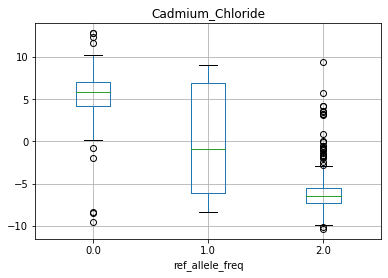

In [232]:

boxplot=assoc_input.boxplot(column=[ 'Cadmium_Chloride'], by=['._C.384'])
plt.title('Cadmium_Chloride')
plt.xlabel('ref_allele_freq')
# plt.ylabel('Cadmium_Chloride')
plt.suptitle('')
plt.savefig('quetion5.png')